In [1]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Data inputing

Input equation type (example: explicit)

In [2]:
equation_type = str(input())

explicit


Input N - number of x > 0 (recommended: 10-15)

In [3]:
N = int(input())

15


Input K - number of t > 0 (recommended: 100-500)

In [4]:
K = int(input())

500


Input T - number of step > 0 (recommended: 1)

In [5]:
T = int(input())

1


Вариант 7:
\begin{align}
\frac {\partial{u}} {\partial{t}} = \frac {\partial ^ 2 {u}} {\partial ^ 2 {x}} + 0.5 \cdot exp(-0.5t) \cdot cos(x), \\
U_x(0, t) = -exp(-0.5t), \\
U_x(\pi, t) = -exp(-0.5t), \\
U(x, 0) = sin(x)
\end{align}

Аналитическое решение:
\begin{align}
U(x, t) = exp(-0.5t) \cdot sin(x)
\end{align}

In [6]:
params = {
    'l': np.pi,
    'psi':  lambda x: np.sin(x),
    'f':    lambda x, t: 0.5 * np.exp(-0.5 * t) * np.cos(x),
    'phi0': lambda t: -np.exp(-0.5 * t),
    'phi1': lambda t: -np.exp(-0.5 * t),
    'solution': lambda x, t: np.exp(-0.5 * t) * np.sin(x),
    'bound_type': 'a1p2',
}

Input type of approximation:
1. 2 point first degree
2. 3 point second degree
3. 2 point second degree

In [18]:
aprox = int(input())
if (aprox == 1):
    params['bound_type'] = 'a1p1'
elif (aprox == 2):
    params['bound_type'] = 'a1p2'
else:
    params['bound_type'] = 'a1p3'

2


In [19]:
solver = ParabolicSolver(params, equation_type)

In [20]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [10]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi, np.pi / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    ax.plot_surface(x, t, z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

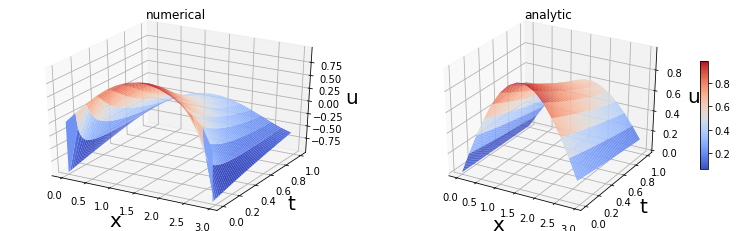

In [21]:
draw(dict_ans, N, K, T)

In [36]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

First elements in error array:

In [29]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20791169081775973]


Middle elements in error array:

In [30]:
print(error[int(K/2)])

[0.7788007830714049, 0.6746542567250486, 0.579594493764653, 0.5013022188983287, 0.4455580747746246, 0.4160122480764494, 0.41418632822207746, 0.43960235874899717, 0.4899036662407378, 0.5608700172406318, 0.6463217416595811, 0.7380138429035642, 0.8256926464445487, 0.8974867668902731, 0.940722570689976]


Last elements in error array:

In [31]:
print(error[-1])

[0.6071374937387897, 0.607897993691634, 0.611859356020001, 0.6214164367690018, 0.63796869434751, 0.6617946315632987, 0.6919899175384744, 0.7264737461736046, 0.7620660405022122, 0.7946359614423683, 0.8193195296005046, 0.8308007413537533, 0.823646247935782, 0.7926786677732388, 0.7333684766208785]


In [37]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.765927477237982


In [38]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 0.001531854954475964
